## Problem I - Backtests a strategy using three moving averages on any indices such as Nifty50, SPY, HSI and so on.

- Compute three moving averages of 20, 40, and 80.
- Go long when the price crosses above all three moving averages.
- Exit the long position when the price crosses below any of the three moving averages.
- Go short when the price crosses below all three moving averages.
- Exit the short position when the price crosses above any of the three moving averages.
- Optional: Optimize all three moving averages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return data

In [3]:
def generate_returns(stock):
    data['p_returns'] = data['Close'].pct_change()
    return data

In [4]:
def backtest_strategy(df, sma, mma, lma, print_chart):
    data = df.copy()
    
    data['sma'] = data['Close'].rolling(window=sma).mean()
    data['mma'] = data['Close'].rolling(window=mma).mean()
    data['lma'] = data['Close'].rolling(window=lma).mean()
    
    # Method 1
    # Generating long entry signals
    data['signal'] = np.where((data['Close'] > data['sma']) &
                             (data['Close'] > data['mma']) &
                             (data['Close'] > data['lma']), 1, 0)
    
        # Generating long exit signals
    data['signal'] = np.where((data['Close'] < data['sma']) &
                             (data['Close'] > data['lma']), 0, data['signal'])

        # Generating short entry signals
    data['signal'] = np.where((data['Close'] < data['sma']) &
                             (data['Close'] < data['mma']) &
                             (data['Close'] < data['lma']), -1, data['signal'])
        
    # Generating short exit signals
    data['signal'] = np.where((data['Close'] > data['sma']) &
                             (data['Close'] < data['lma']), 0, data['signal'])
    
    if print_chart == True:
        data[['signal', 'sma', 'lma', 'Close']].iloc[50:130].plot(figsize=(10, 6), secondary_y='signal')
    
    data['strategy_returns'] = data['p_returns'] * data['signal'].shift(1)
    
    return data

In [5]:
def calculate_returns(data):
    bnh = (data['p_returns']+1).cumprod()[-1]
    s_returns = (data['strategy_returns']+1).cumprod()[-1]
    
    return bnh, s_returns

[*********************100%***********************]  1 of 1 completed
Buy and hold returns: 1.67
Strategy returns: 1.43


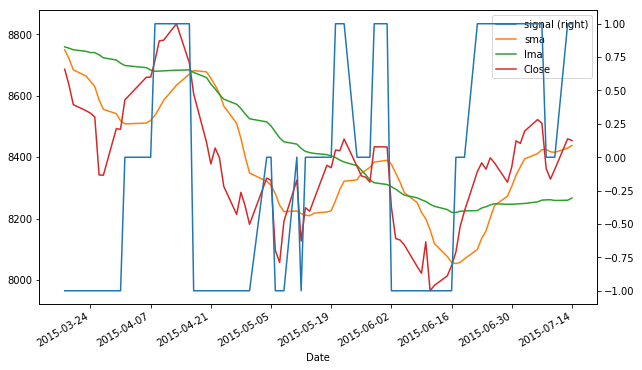

In [6]:
data = download_data('^NSEI', '2015-1-1', '2020-12-31')
data = generate_returns(data)
data = backtest_strategy(data, 10, 20, 30, True)

bnh, s_returns = calculate_returns(data)

print('Buy and hold returns:', np.round(bnh, 2))
print('Strategy returns:', np.round(s_returns, 2))

In [7]:
data = download_data('^NSEI', '2015-1-1', '2020-12-31')

# Optimize the strategy
for sma in range(30, 40, 5):
    for mma in range(60, 75, 5):
        for lma in range(100, 115, 5):
            print(f'\nChecking for SMA: {sma}, MMA: {mma}, LMA: {lma}')
            df = data.copy()
            df = data = generate_returns(df)
            df = backtest_strategy(df, sma, mma, lma, False)
            bnh, s_returns = calculate_returns(df)
            print('Buy and hold returns:', np.round(bnh, 2))
            print('Strategy returns:', np.round(s_returns, 2))
else:
    print('Computation Completed.')

[*********************100%***********************]  1 of 1 completed

Checking for SMA: 30, MMA: 60, LMA: 100
Buy and hold returns: 1.67
Strategy returns: 1.68

Checking for SMA: 30, MMA: 60, LMA: 105
Buy and hold returns: 1.67
Strategy returns: 1.65

Checking for SMA: 30, MMA: 60, LMA: 110
Buy and hold returns: 1.67
Strategy returns: 1.65

Checking for SMA: 30, MMA: 65, LMA: 100
Buy and hold returns: 1.67
Strategy returns: 1.68

Checking for SMA: 30, MMA: 65, LMA: 105
Buy and hold returns: 1.67
Strategy returns: 1.65

Checking for SMA: 30, MMA: 65, LMA: 110
Buy and hold returns: 1.67
Strategy returns: 1.65

Checking for SMA: 30, MMA: 70, LMA: 100
Buy and hold returns: 1.67
Strategy returns: 1.67

Checking for SMA: 30, MMA: 70, LMA: 105
Buy and hold returns: 1.67
Strategy returns: 1.64

Checking for SMA: 30, MMA: 70, LMA: 110
Buy and hold returns: 1.67
Strategy returns: 1.64

Checking for SMA: 35, MMA: 60, LMA: 100
Buy and hold returns: 1.67
Strategy returns: 1.79

Checking for SMA: 35